# Prepare

In [4]:
# These are my default settings
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import joblib

plt.rcParams["figure.figsize"] = (12, 6)
sns.set()
pd.set_option("display.max_columns", None)

In [5]:
# check abalability of gpu.  if  '/device:GPU:0', gpu is abalable
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Activation, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

In [7]:
# set parameters
classes = ["Alien", "Predator"]
nb_classes = len(classes)

image_height = 150
image_width = 150

data = "../alien_vs_predator_ep2/Data"
os.listdir(data)

['Test', 'Train', 'Validation']

In [8]:
train_dir = f"{data}/Train"
valid_dir = f"{data}/Validation"

nb_train_samples = 494
nb_valid_samples = 200

nb_epoch = 500

# Get images (with Image Data Generator) --commented out. OOM with rtx3060 6GB

In [9]:
# train_datagen = ImageDataGenerator(
#     preprocessing_function = preprocess_input,
#     rescale = 1./255
# )
# valid_datagen = ImageDataGenerator(
    
#     rescale = 1./255
# )

In [10]:
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size = (image_width, image_height),
#     color_mode = "rgb",
#     classes = classes,
#     class_mode = "binary",
#     batch_size = 494
# )

# valid_generator = valid_datagen.flow_from_directory(
#     valid_dir,
#     target_size = (image_width, image_height),
#     color_mode = "rgb",
#     classes = classes,
#     class_mode = "binary",
#     batch_size = 200
# )

# Get Images 

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory as get_img

train_data = get_img(
    train_dir,
    image_size=(image_width, image_height),
    batch_size=494
)
valid_data = get_img(
    valid_dir,
    image_size=(image_width, image_height),
    batch_size=200
)


Found 494 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


# VGG16 (advanced) -- commented out

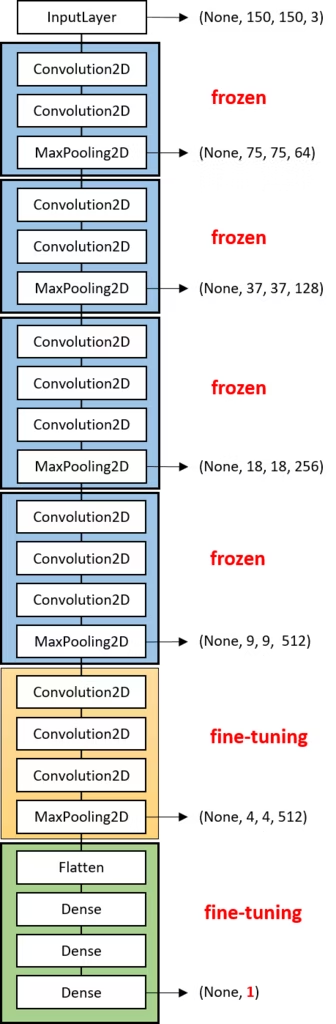

In [12]:
# # load VGG16 

# input_tensor = Input(shape=(image_width, image_height, 3))
# vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=input_tensor)

# # section green in image above
# base_model = Sequential()
# base_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
# base_model.add(Dense(units=256, activation='relu', input_dim=4 * 4 * 512))
# base_model.add(Dense(units=1, activation='sigmoid'))

# #  vgg16 + green
# vgg_model = Model(
#     inputs = vgg16.input,
#     outputs = base_model(vgg16.output)
# )

# # fix the wweights of blue section
# for layer in vgg_model.layers[:15]:
#     layer.trainable = False

In [13]:
# # compile
# vgg_model.compile(
#     loss = "binary_crossentropy",
#     optimizer='adam',
#     metrics=['accuracy']
# )

In [14]:
# # Fine-tuning

# print(tf.__version__)

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print("Physical GPUs: {}, Logical GPUs: {}".format(len(gpus), len(logical_gpus)))
# else:
#     print("CPU only")
    
# history = vgg_model.fit(
#     train_generator,
#     batch_size = nb_train_samples,
#     epochs = nb_epoch,
#     validation_data = valid_generator,
# )


# vgg16 simple + preprocess input

In [15]:
for X_train, y_train in train_data.take(1):
    print(type(X_train), X_train.shape, "\n", type(y_train), y_train.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (494, 150, 150, 3) 
 <class 'tensorflow.python.framework.ops.EagerTensor'> (494,)


In [16]:
for X_valid, y_valid in valid_data.take(1):
    print(type(X_valid), X_valid.shape, "\n", type(y_valid), y_valid.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (200, 150, 150, 3) 
 <class 'tensorflow.python.framework.ops.EagerTensor'> (200,)


In [17]:
#Scaling
X_train_np = X_train.numpy().astype("float32")
X_valid_np = X_valid.numpy().astype("float32")

print(
    " X_train_np :",type(X_train_np),X_train_np.shape,
    "\n",
    "X_valid_np :",type(X_valid_np),X_valid_np.shape
)

 X_train_np : <class 'numpy.ndarray'> (494, 150, 150, 3) 
 X_valid_np : <class 'numpy.ndarray'> (200, 150, 150, 3)


In [18]:
y_train

<tf.Tensor: shape=(494,), dtype=int32, numpy=
array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
     

In [19]:
y_train_np = y_train.numpy()
y_valid_np = y_valid.numpy()
y_train_np

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [20]:
vgg16 = VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (150, 150, 3)
)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# vgg16 predict

In [21]:
X_train_predict = vgg16.predict(
    preprocess_input(X_train_np)
)
X_valid_predict = vgg16.predict(
    preprocess_input(X_valid_np)
)

7/7 [==============================] - 0s 66ms/step


In [22]:
X_train_predict.shape

(494, 4, 4, 512)

# classification

In [23]:
X_train_reshaped = np.reshape(X_train_predict, (494, 4*4*512))
X_valid_reshaped = np.reshape(X_valid_predict, (200, 4*4*512))
X_train_reshaped.shape

(494, 8192)

In [47]:
model = Sequential([
    Dense(256, activation='relu', input_dim=4 * 4 * 512),
    Dense(1, activation='sigmoid')
])


In [48]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [49]:
print(tf.__version__)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print("Physical GPUs: {}, Logical GPUs: {}".format(len(gpus), len(logical_gpus)))
else:
    print("CPU only")

history = model.fit(
    x = X_train_reshaped,
    y = y_train_np,
    batch_size = 494,
    epochs = 100,
    validation_data = (X_valid_reshaped, y_valid_np)
)

2.10.0
Physical GPUs: 1, Logical GPUs: 1
Epoch 1/100
1/1 [==============================] - 0s 472ms/step - loss: 5.7817 - accuracy: 0.4960 - val_loss: 80.9908 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 60ms/step - loss: 78.2085 - accuracy: 0.5000 - val_loss: 41.9007 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 37.3105 - accuracy: 0.5000 - val_loss: 7.7831 - val_accuracy: 0.6600
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 4.9153 - accuracy: 0.7105 - val_loss: 0.6028 - val_accuracy: 0.8650
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 0.3650 - accuracy: 0.9615 - val_loss: 4.9786 - val_accuracy: 0.6150
Epoch 6/100
1/1 [==============================] - 0s 56ms/step - loss: 3.1665 - accuracy: 0.7267 - val_loss: 5.8716 - val_accuracy: 0.5650
Epoch 7/100
1/1 [==============================] - 0s 56ms/step - loss: 3.8090 - accuracy: 0.6377 - val_loss: 3.86

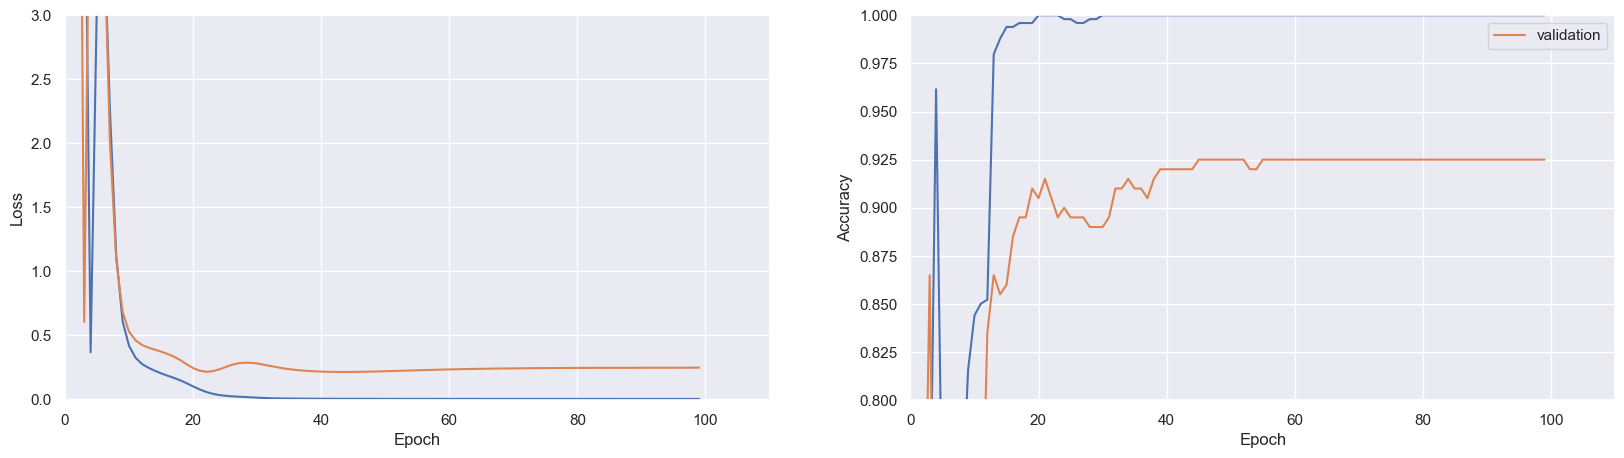

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))  # make 2 subplots

# subplot for loss
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'], label="validation")
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xlim(0, 110)
ax[0].set_ylim(-0.01, 3)

# subplot for acc
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'], label="validation")
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlim(0, 110)
ax[1].set_ylim(0.8, 1)
plt.legend()
plt.show()


# Report & Confusion Matrix

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def make_report(model, input_X_data_np, y_truedata_np):
    """This function lets Classification_report, Confusion Matrix(Heat map) and ROC-AUC out. FOR CLASSIFICATION ONLY"""
    
    # Classification_report
    y_pred = model.predict(input_X_data_np)
    cr = classification_report(y_true=y_truedata_np, y_pred=y_pred>0.75)
    print(cr)
    
    # Confusion Matrix(Heat map)
    cm = confusion_matrix(y_true=y_truedata_np, y_pred=y_pred>0.75)
    cm_heat = pd.DataFrame(data=cm, index=["Alien", "Predator"], 
                           columns=["Alien", "Predator"])
    sns.heatmap(cm_heat, square=True, annot=True, cmap="Spectral")
    plt.xlabel("Pred")
    plt.ylabel("True")
    plt.yticks(rotation=0)
    plt.show()
    

    # ROC-AUC

    fpr, tpr, thresholds = roc_curve(y_truedata_np, y_pred)
    ac = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%ac)
    plt.fill_between(fpr, tpr, 0, color="red", alpha=0.1)
    plt.legend()
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    # plt.grid()
    plt.show()
    
    



In [3]:
# Run this code if karnel has been shutted out.

import tensorflow as tf
from tensorflow.keras import models
model = models.load_model("model_ep3")

## Train Report

16/16 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       247

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



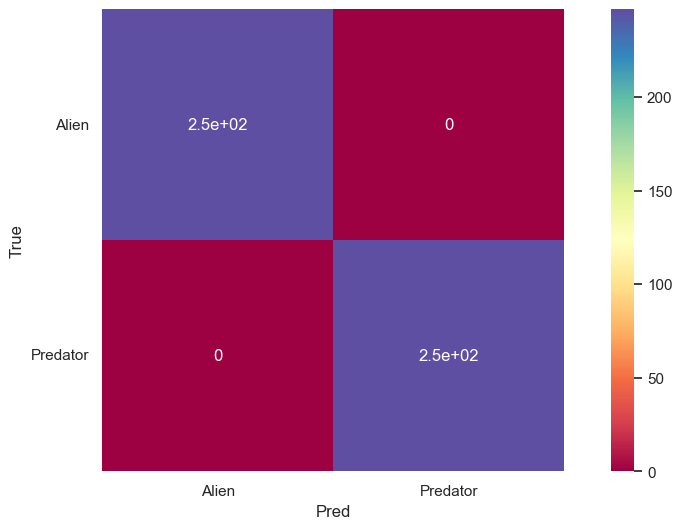

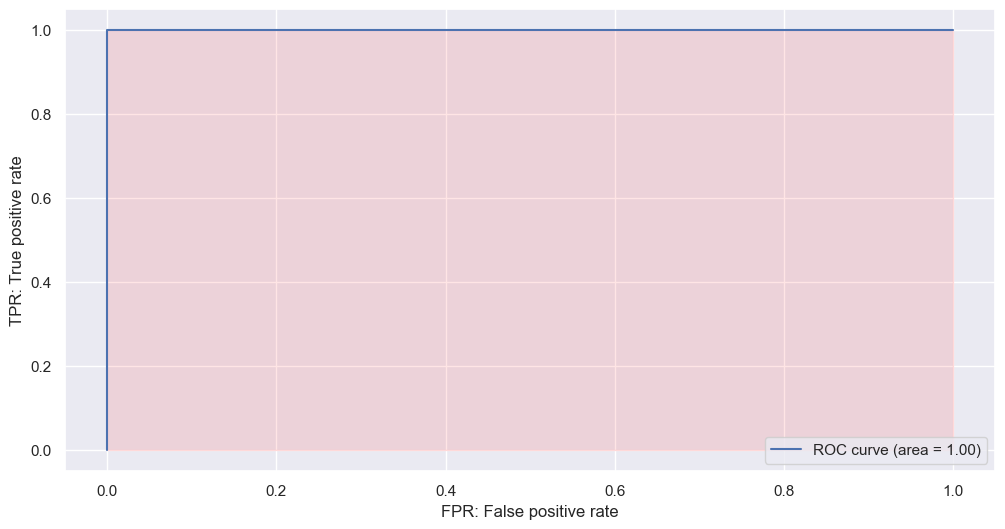

In [29]:
make_report(model, X_train_reshaped, y_train_np)

## Valid Report

7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       100
           1       0.91      0.95      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



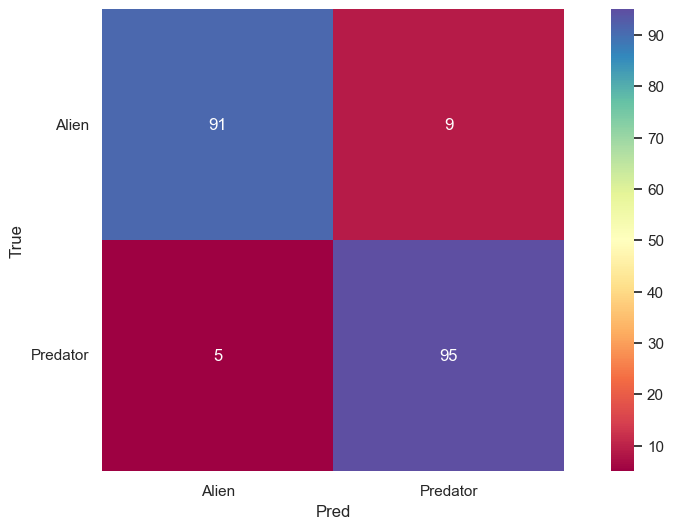

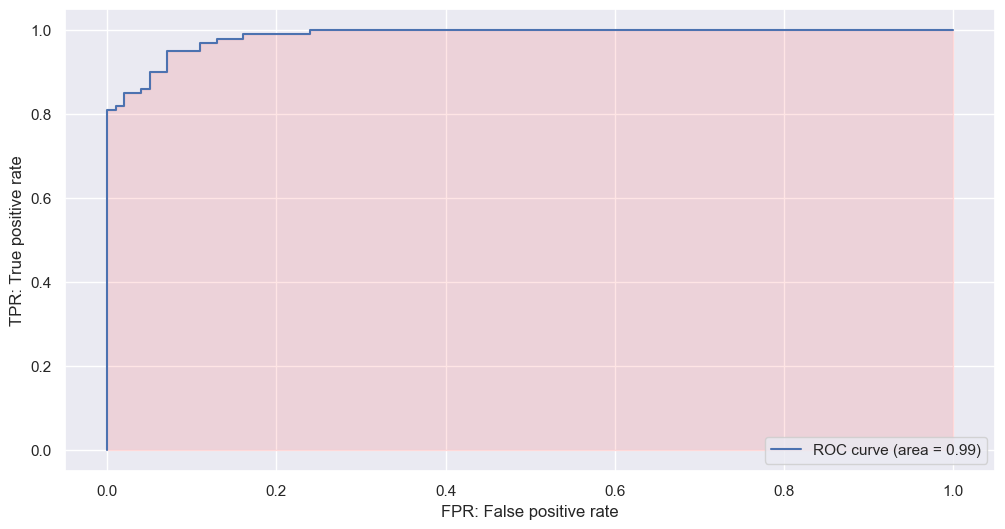

In [30]:
make_report(model, X_valid_reshaped, y_valid_np)

# Save data

In [63]:
# save trained model

model.save("model_ep3")

vgg16.save("vgg16_ep3")

INFO:tensorflow:Assets written to: model_ep3\assets


INFO:tensorflow:Assets written to: vgg16_ep3\assets


INFO:tensorflow:Assets written to: vgg16_ep3\assets


In [60]:
pwd = os.getcwd()
pwd
save_files = pwd + "\\save_files"
if not os.path.exists(save_files):
    os.mkdir(save_files)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     